# **FACIAL EMOTIONS DETECTION:**

## **Libraries:**

In [33]:
import os
import numpy as np
import tensorflow as tf
import imgaug.augmenters as iaa
import pandas as pd 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils import to_categorical, load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

## **Palette & Style:**

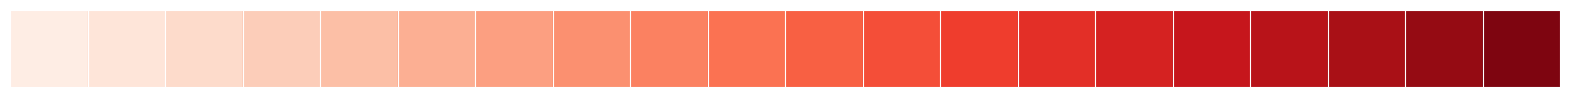

In [93]:
sns.set_style('darkgrid')
sns.set_palette("Reds")
sns.palplot(sns.color_palette('Reds', 20))

## **Helper Functions:**

In [55]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [56]:
def extract_features(images, augmented = False):
    features = []
    if augmented:
        for image in tqdm(images):
            img = load_img(image,grayscale =  True )
            img = np.array(img)
            augmented_img = augmentation(image=img)
            augmented_img = np.array(augmented_img)
            features.append(augmented_img)
    else:
        for image in tqdm(images):
            img = load_img(image,grayscale =  True )
            img = np.array(img)
            features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [84]:
def processing(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [58]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5), 
    iaa.Affine(rotate=(-10, 10)) 
])

## **Data Acquisition:**

In [59]:
TRAIN_DIR = "./images/train/"
TEST_DIR = "./images/validation/"

In [60]:
test_data = pd.DataFrame()
train_data = pd.DataFrame()
test_data["images"], test_data["labels"] = createdataframe(TEST_DIR)
train_data["images"], train_data["labels"] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


## **Data Preprocessing:**

In [61]:
train_features = np.concatenate((extract_features(train_data['images']), extract_features(train_data['images'], augmented = True)), axis=0)
test_features = np.concatenate((extract_features(test_data['images']), extract_features(test_data['images'], augmented = True)), axis = 0)

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [62]:
x_train = train_features/255.0
x_test = test_features/255.0

In [63]:
le = LabelEncoder()
le.fit(pd.concat((train_data['labels'],train_data['labels']), axis = 0))
y_train = le.transform(pd.concat((train_data['labels'],train_data['labels']), axis = 0))
y_test = le.transform(pd.concat((test_data['labels'],test_data['labels']), axis = 0))

In [64]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

## **Training & Saving the Model:**

In [16]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='linear'))

In [17]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
filepath = './tmp/weights-{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'auto', start_from_epoch = 20, verbose = 0)
log_csv = CSVLogger('my_logs.csv', separator = ',', append = False)
callbacks_list = [early_stop, log_csv, checkpoint]
model.compile(optimizer = 'adam', loss = loss_fn, metrics = 'accuracy')
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 80, validation_data = (x_test,y_test), callbacks = callbacks_list) 

Epoch 1/80
451/451 [==============================] - 537s 1s/step - loss: 1.8052 - accuracy: 0.2512 - val_loss: 1.7133 - val_accuracy: 0.2975
Epoch 2/80
451/451 [==============================] - 538s 1s/step - loss: 1.6437 - accuracy: 0.3397 - val_loss: 1.4815 - val_accuracy: 0.4297
Epoch 3/80
451/451 [==============================] - 543s 1s/step - loss: 1.4918 - accuracy: 0.4198 - val_loss: 1.3588 - val_accuracy: 0.4728
Epoch 4/80
451/451 [==============================] - 544s 1s/step - loss: 1.4063 - accuracy: 0.4552 - val_loss: 1.2909 - val_accuracy: 0.5046
Epoch 5/80
451/451 [==============================] - 546s 1s/step - loss: 1.3578 - accuracy: 0.4785 - val_loss: 1.2349 - val_accuracy: 0.5302
Epoch 6/80
451/451 [==============================] - 539s 1s/step - loss: 1.3209 - accuracy: 0.4964 - val_loss: 1.2023 - val_accuracy: 0.5395
Epoch 7/80
451/451 [==============================] - 551s 1s/step - loss: 1.2873 - accuracy: 0.5077 - val_loss: 1.1862 - val_accuracy: 0.5492

In [24]:
model.save('model_architecture.hdf5')

c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


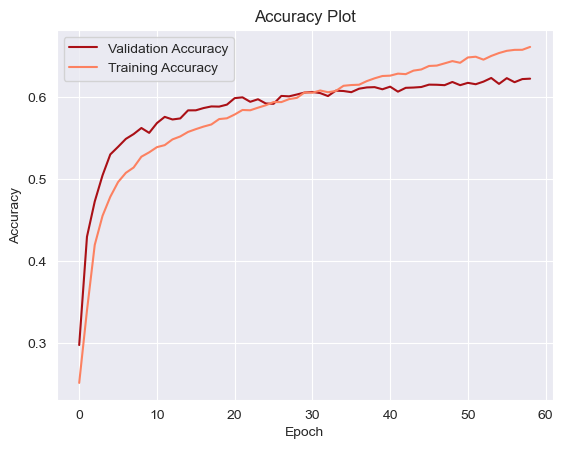

In [39]:
losses = pd.read_csv('my_logs.csv')

sns.lineplot(data=losses['val_accuracy'], color=sns.color_palette("Reds")[-1], label='Validation Accuracy')
sns.lineplot(data=losses['accuracy'], color=sns.color_palette("Reds")[2], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [29]:
prog_model = load_model('model_architecture.hdf5')
prog_model.load_weights('./tmp/weights-54-1.03.hdf5')
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
filepath = './tmp/weights-6{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'auto', start_from_epoch = 10, verbose = 1)
log_csv = CSVLogger('my_logs.csv', separator = ',', append = True)
callbacks_list = [early_stop, log_csv, checkpoint]
prog_model.compile(optimizer = 'adam', loss = loss_fn, metrics = 'accuracy')
prog_model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 20, validation_data = (x_test,y_test), callbacks = callbacks_list) 

Epoch 1/20
451/451 [==============================] - 588s 1s/step - loss: 0.9406 - accuracy: 0.6523 - val_loss: 1.0318 - val_accuracy: 0.6211
Epoch 2/20


c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 614s 1s/step - loss: 0.9321 - accuracy: 0.6545 - val_loss: 1.0399 - val_accuracy: 0.6234
Epoch 3/20
451/451 [==============================] - 623s 1s/step - loss: 0.9282 - accuracy: 0.6562 - val_loss: 1.0305 - val_accuracy: 0.6244
Epoch 4/20
451/451 [==============================] - 614s 1s/step - loss: 0.9171 - accuracy: 0.6629 - val_loss: 1.0368 - val_accuracy: 0.6218
Epoch 5/20
451/451 [==============================] - 617s 1s/step - loss: 0.9203 - accuracy: 0.6608 - val_loss: 1.0335 - val_accuracy: 0.6247
Epoch 6/20
451/451 [==============================] - 616s 1s/step - loss: 0.9179 - accuracy: 0.6616 - val_loss: 1.0319 - val_accuracy: 0.6213
Epoch 7/20
451/451 [==============================] - 615s 1s/step - loss: 0.9109 - accuracy: 0.6627 - val_loss: 1.0292 - val_accuracy: 0.6255
Epoch 8/20
451/451 [==============================] - 616s 1s/step - loss: 0.9062 - accuracy: 0.6657 - val_loss: 1.0361 - val_accuracy: 0.6220
Epoch 9/20

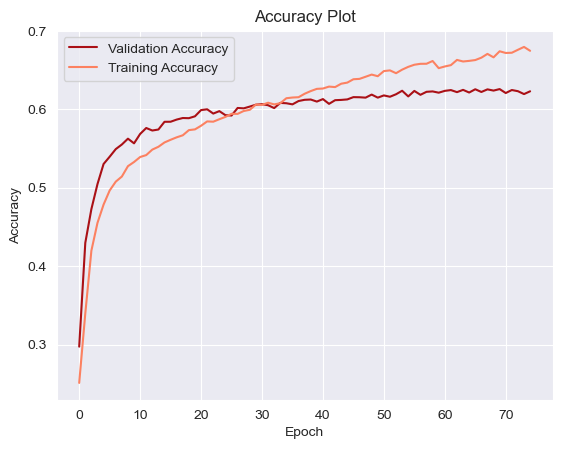

In [43]:
losses = pd.read_csv('my_logs.csv')

fig, ax = plt.subplots()
sns.lineplot(data=losses['val_accuracy'], color=sns.color_palette("Reds")[-1], label='Validation Accuracy')
sns.lineplot(data=losses['accuracy'], color=sns.color_palette("Reds")[2], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [20]:
prog_model2 = load_model('model_architecture.hdf5')
prog_model2.load_weights('./tmp/weights-611-1.02.hdf5')
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
filepath = './tmp/weights-7{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'auto', start_from_epoch = 10, verbose = 1)
log_csv = CSVLogger('my_logs.csv', separator = ',', append = True)
callbacks_list = [early_stop, log_csv, checkpoint]
prog_model2.compile(optimizer = 'adam', loss = loss_fn, metrics = 'accuracy')
prog_model2.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test), callbacks = callbacks_list) 

Epoch 1/10
451/451 [==============================] - ETA: 0s - loss: 0.9752 - accuracy: 0.6437

c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 655s 1s/step - loss: 0.9752 - accuracy: 0.6437 - val_loss: 1.0328 - val_accuracy: 0.6188
Epoch 2/10
451/451 [==============================] - 840s 2s/step - loss: 0.9690 - accuracy: 0.6438 - val_loss: 1.0327 - val_accuracy: 0.6141
Epoch 3/10
451/451 [==============================] - 570s 1s/step - loss: 0.9608 - accuracy: 0.6479 - val_loss: 1.0203 - val_accuracy: 0.6242
Epoch 4/10
451/451 [==============================] - 602s 1s/step - loss: 0.9552 - accuracy: 0.6493 - val_loss: 1.0244 - val_accuracy: 0.6228
Epoch 5/10
451/451 [==============================] - 632s 1s/step - loss: 0.9439 - accuracy: 0.6563 - val_loss: 1.0261 - val_accuracy: 0.6277
Epoch 6/10
451/451 [==============================] - 627s 1s/step - loss: 0.9413 - accuracy: 0.6557 - val_loss: 1.0203 - val_accuracy: 0.6284
Epoch 7/10
451/451 [==============================] - 616s 1s/step - loss: 0.9385 - accuracy: 0.6551 - val_loss: 1.0137 - val_accuracy: 0.6277
Epoch 8/10

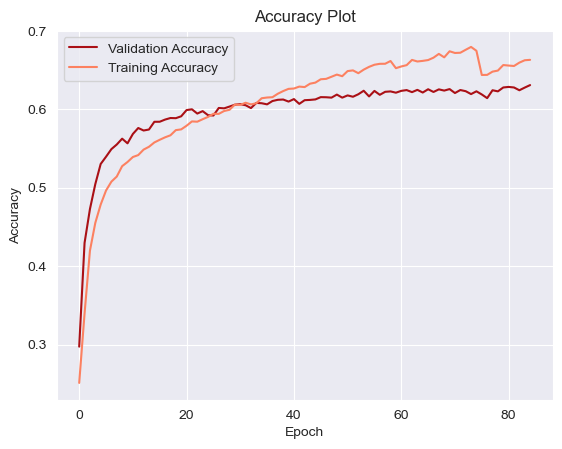

In [46]:
losses = pd.read_csv('my_logs.csv')

sns.lineplot(data=losses['val_accuracy'], color=sns.color_palette("Reds")[-1], label='Validation Accuracy')
sns.lineplot(data=losses['accuracy'], color=sns.color_palette("Reds")[2], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [23]:
prog_model3 = load_model('model_architecture.hdf5')
prog_model3.load_weights('./tmp/weights-710-1.01.hdf5')
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
filepath = './tmp/weights-8{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'auto', start_from_epoch = 10, verbose = 1)
log_csv = CSVLogger('my_logs.csv', separator = ',', append = True)
callbacks_list = [early_stop, log_csv, checkpoint]
prog_model3.compile(optimizer = 'adam', loss = loss_fn, metrics = 'accuracy')
prog_model3.fit(x= x_train,y = y_train, batch_size = 128, epochs = 15, validation_data = (x_test,y_test), callbacks = callbacks_list) 

Epoch 1/15
451/451 [==============================] - 576s 1s/step - loss: 0.9198 - accuracy: 0.6628 - val_loss: 1.0157 - val_accuracy: 0.6296
Epoch 2/15


c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 616s 1s/step - loss: 0.9090 - accuracy: 0.6672 - val_loss: 1.0280 - val_accuracy: 0.6236
Epoch 3/15
451/451 [==============================] - 616s 1s/step - loss: 0.9043 - accuracy: 0.6692 - val_loss: 1.0166 - val_accuracy: 0.6291
Epoch 4/15
451/451 [==============================] - 617s 1s/step - loss: 0.9036 - accuracy: 0.6706 - val_loss: 1.0144 - val_accuracy: 0.6283
Epoch 5/15
451/451 [==============================] - 615s 1s/step - loss: 0.8934 - accuracy: 0.6705 - val_loss: 1.0124 - val_accuracy: 0.6295
Epoch 6/15
451/451 [==============================] - 619s 1s/step - loss: 0.8898 - accuracy: 0.6759 - val_loss: 1.0171 - val_accuracy: 0.6282
Epoch 7/15
451/451 [==============================] - 626s 1s/step - loss: 0.8871 - accuracy: 0.6750 - val_loss: 1.0183 - val_accuracy: 0.6274
Epoch 8/15
451/451 [==============================] - 647s 1s/step - loss: 0.8794 - accuracy: 0.6791 - val_loss: 1.0128 - val_accuracy: 0.6291
Epoch 9/15

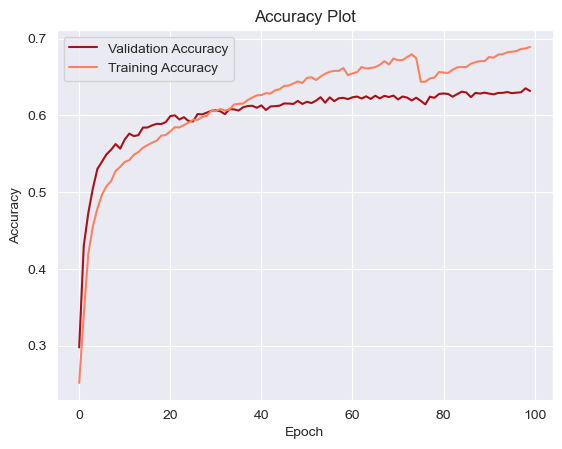

In [48]:
losses = pd.read_csv('my_logs.csv')

sns.lineplot(data=losses['val_accuracy'], color=sns.color_palette("Reds")[-1], label='Validation Accuracy')
sns.lineplot(data=losses['accuracy'], color=sns.color_palette("Reds")[2], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [25]:
prog_model4 = load_model('model_architecture.hdf5')
prog_model4.load_weights('./tmp/weights-814-1.01.hdf5')
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
filepath = './tmp/weights-9{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'auto', start_from_epoch = 10, verbose = 1)
log_csv = CSVLogger('my_logs.csv', separator = ',', append = True)
callbacks_list = [early_stop, log_csv, checkpoint]
prog_model4.compile(optimizer = 'adam', loss = loss_fn, metrics = 'accuracy')
prog_model4.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test), callbacks = callbacks_list) 

Epoch 1/10
451/451 [==============================] - 611s 1s/step - loss: 0.8574 - accuracy: 0.6870 - val_loss: 1.0151 - val_accuracy: 0.6298
Epoch 2/10


c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 615s 1s/step - loss: 0.8522 - accuracy: 0.6889 - val_loss: 1.0119 - val_accuracy: 0.6318
Epoch 3/10
451/451 [==============================] - 616s 1s/step - loss: 0.8495 - accuracy: 0.6934 - val_loss: 1.0060 - val_accuracy: 0.6309
Epoch 4/10
451/451 [==============================] - 621s 1s/step - loss: 0.8500 - accuracy: 0.6899 - val_loss: 1.0136 - val_accuracy: 0.6300
Epoch 5/10
451/451 [==============================] - 622s 1s/step - loss: 0.8464 - accuracy: 0.6931 - val_loss: 1.0108 - val_accuracy: 0.6344
Epoch 6/10
451/451 [==============================] - 621s 1s/step - loss: 0.8321 - accuracy: 0.6972 - val_loss: 1.0296 - val_accuracy: 0.6280
Epoch 7/10
451/451 [==============================] - 618s 1s/step - loss: 0.8366 - accuracy: 0.6972 - val_loss: 1.0058 - val_accuracy: 0.6347
Epoch 8/10
451/451 [==============================] - 619s 1s/step - loss: 0.8314 - accuracy: 0.6994 - val_loss: 1.0180 - val_accuracy: 0.6309
Epoch 9/10

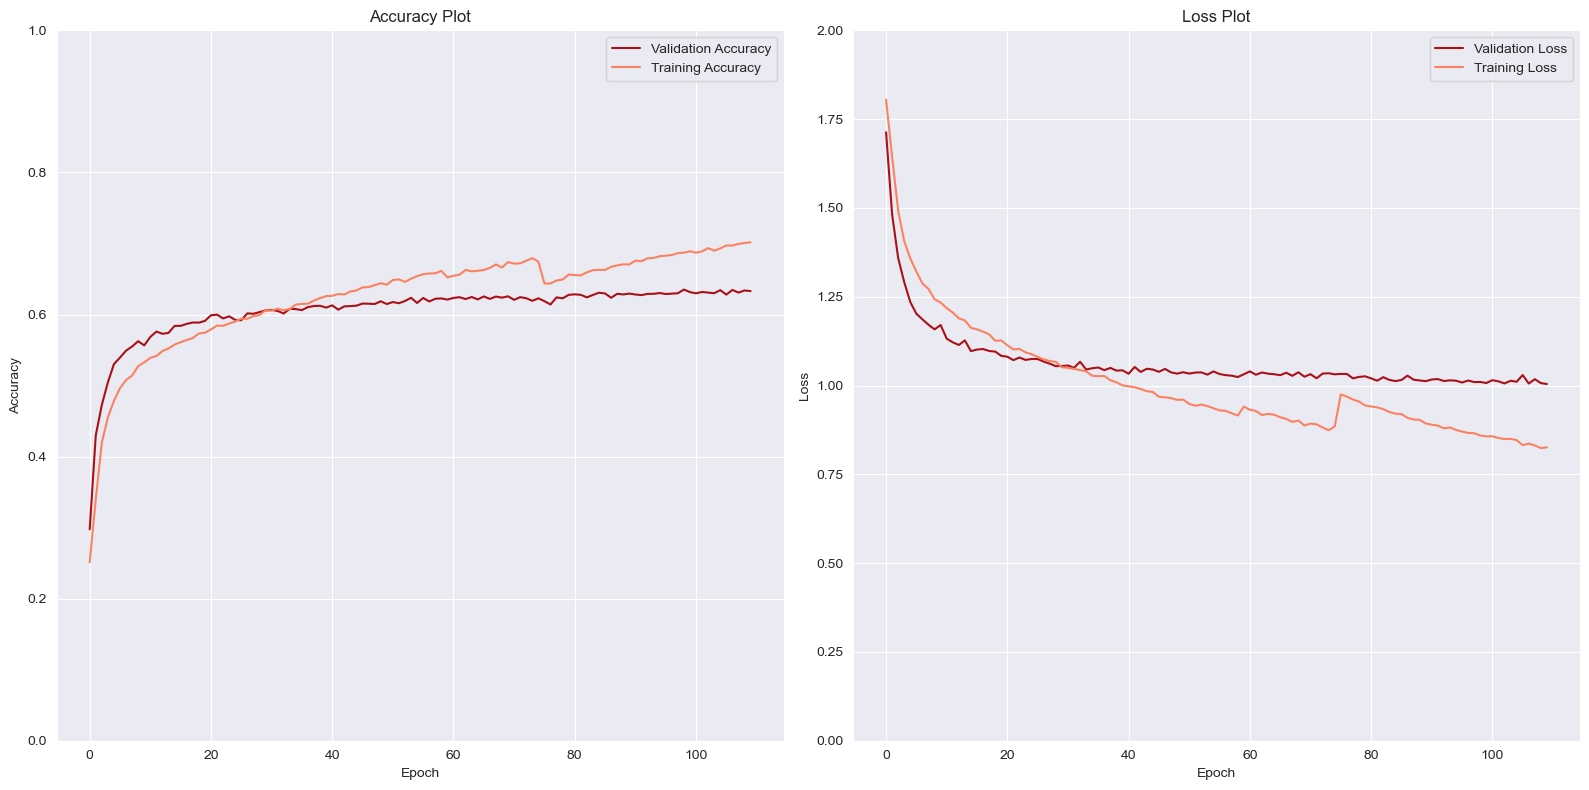

In [29]:
losses = pd.read_csv('my_logs.csv')
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

sns.lineplot(data=losses, x=losses.index, y='val_accuracy', color=sns.color_palette("Reds")[-1], label='Validation Accuracy', ax=ax[0])
sns.lineplot(data=losses, x=losses.index, y='accuracy', color=sns.color_palette("Reds")[2], label='Training Accuracy', ax=ax[0])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy Plot')
ax[0].legend()

sns.lineplot(data=losses, x=losses.index, y='val_loss', color=sns.color_palette("Reds")[-1], label='Validation Loss', ax=ax[1])
sns.lineplot(data=losses, x=losses.index, y='loss', color=sns.color_palette("Reds")[2], label='Training Loss', ax=ax[1])
ax[1].set_ylim(0, 2)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss Plot')
ax[1].legend()

plt.tight_layout()
plt.show()

In [31]:
model.save('model_architecture.hdf5')

c:\Users\ahmad\anaconda\envs\newConda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Loading the Model:**

In [82]:
model_t = load_model('model_architecture.hdf5')
model_t.load_weights('finalWeights.hdf5')

## **Testing:**

442/442 [==============================] - 23s 52ms/step


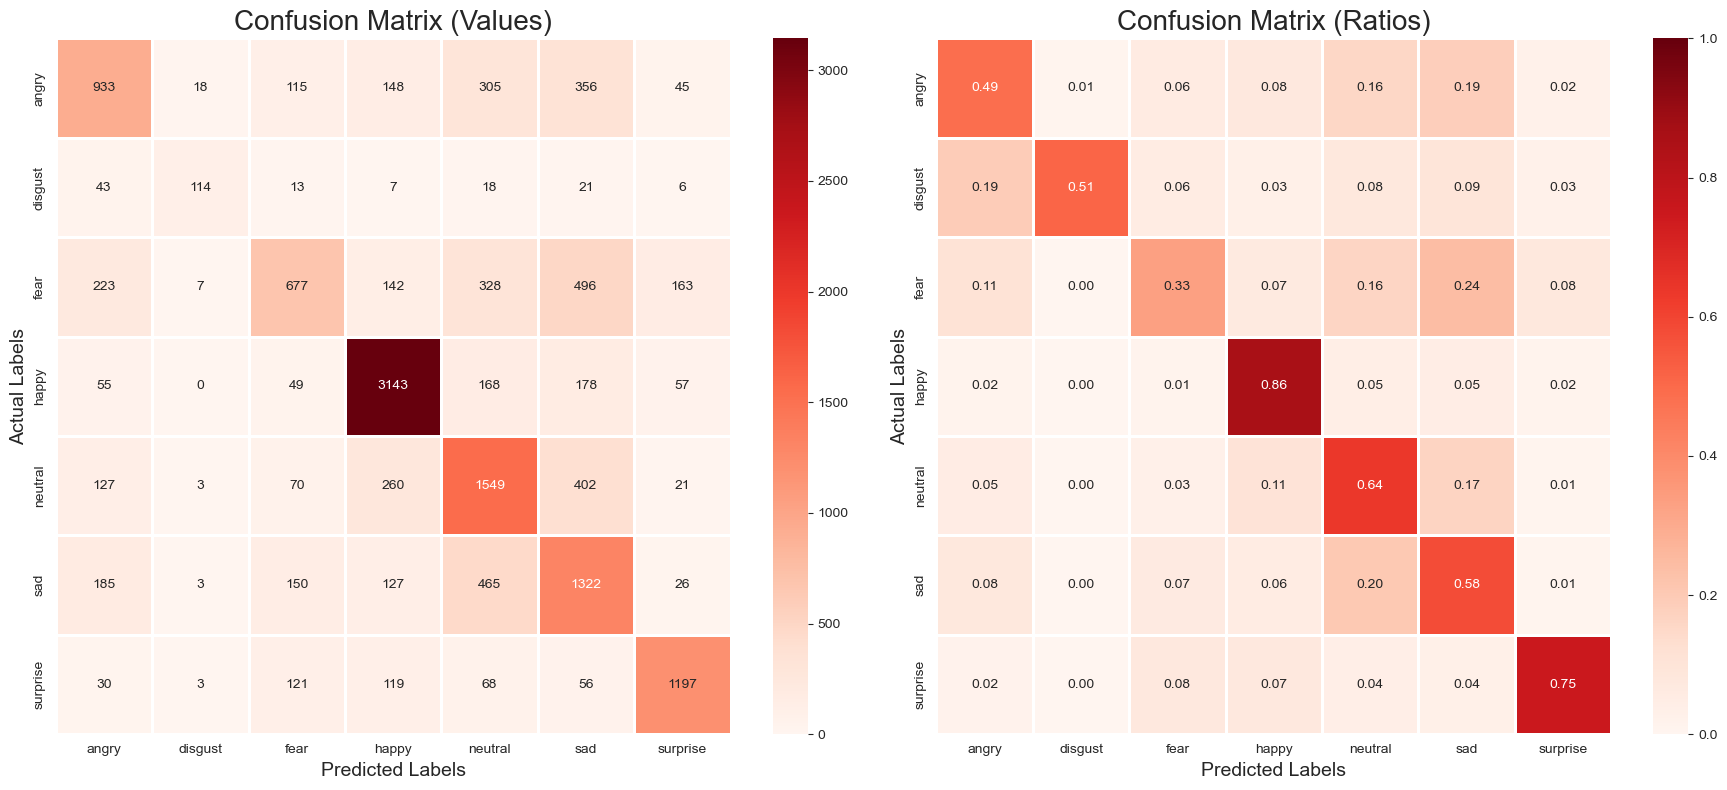

In [79]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']
val_counts = {'angry':1920, 'disgust':222, 'fear':2036, 'happy':3650, 'neutral':2432, 'sad':2278, 'surprise':1594}
pred_label = [label[i.argmax()] for i in model_t.predict(x_test)]
test_label = [label[i.argmax()] for i in y_test]
cm = confusion_matrix(test_label, pred_label)
cm = pd.DataFrame(cm, index=label, columns=label)

ratios = np.zeros((len(label), len(label)))
for i, true_label in enumerate(label):
    for j, pred_label in enumerate(label):
        pred_count = val_counts[pred_label]
        true_count = val_counts[true_label]
        ratio = cm.iloc[i, j] / true_count
        ratios[i, j] = ratio
        
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix (Values)', size=20)
axes[0].set_xlabel('Predicted Labels', size=14)
axes[0].set_ylabel('Actual Labels', size=14)

sns.heatmap(pd.DataFrame(ratios, index=label, columns=label), linecolor='white', cmap='Reds', linewidth=1, annot=ratios, fmt='.2f', vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Confusion Matrix (Ratios)', size=20)
axes[1].set_xlabel('Predicted Labels', size=14)
axes[1].set_ylabel('Actual Labels', size=14)

plt.tight_layout()
plt.show()

original image is of sad
1/1 [==============================] - 0s 22ms/step
model prediction is  sad


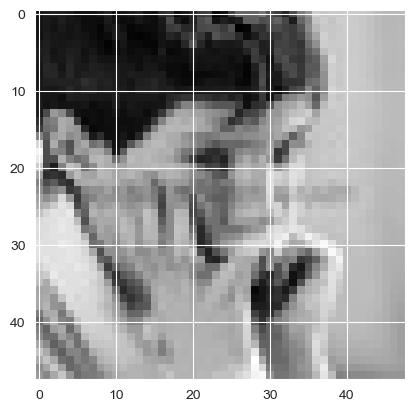

In [88]:
image = 'images/train/sad/3.jpg'
print("original image is of sad")
img = processing(image)
pred = model_t.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 204ms/step
model prediction is  fear


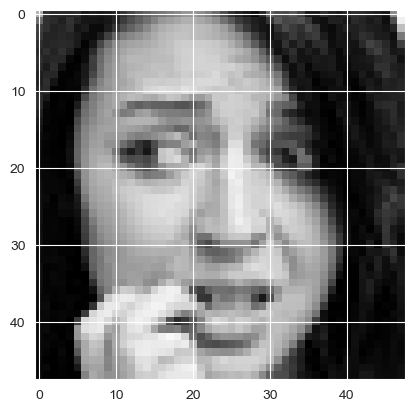

In [86]:
image = 'images/validation/fear/21.jpg'
print("original image is of fear")
img = processing(image)
pred = model_t.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 23ms/step
model prediction is  angry


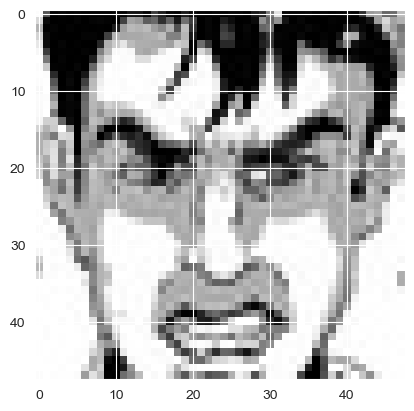

In [89]:
image = 'images/validation/angry/38.jpg'
print("original image is of angry")
img = processing(image)
pred = model_t.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 29ms/step
model prediction is  sad


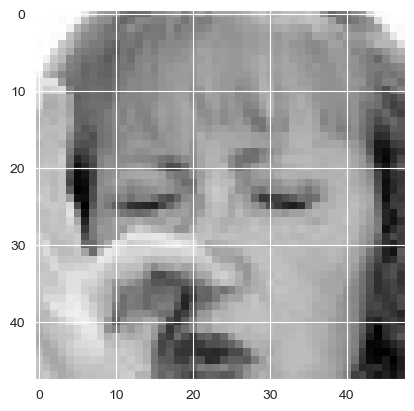

In [91]:
image = 'images/validation/disgust/19649.jpg'
print("original image is of disgust")
img = processing(image)
pred = model_t.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')